In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
from powerbiclient import Report, models
from powerbiclient.authentication import DeviceCodeLoginAuthentication

In [2]:
df = pd.read_csv("data.csv", encoding='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
print(df.shape)

(541909, 8)


In [4]:
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [5]:
print(df.info)

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  Custome

In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df.sort_values(by="UnitPrice", ascending=False).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,-1,6/10/2011 15:31,38970.00,15098.0,United Kingdom
524602,C580605,AMAZONFEE,AMAZON FEE,-1,12/5/2011 11:36,17836.46,NaN,United Kingdom
43702,C540117,AMAZONFEE,AMAZON FEE,-1,1/5/2011 9:55,16888.02,NaN,United Kingdom
43703,C540118,AMAZONFEE,AMAZON FEE,-1,1/5/2011 9:57,16453.71,NaN,United Kingdom
15017,537632,AMAZONFEE,AMAZON FEE,1,12/7/2010 15:08,13541.33,NaN,United Kingdom


In [8]:
# Filtrer les lignes où Quantity est égal à -1
filtered_df = df.query("Quantity == -1")

filtered_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
1441,C536543,22632,HAND WARMER RED RETROSPOT,-1,12/1/2010 14:30,2.10,17841.0,United Kingdom
1975,C536548,20914,SET/5 RED RETROSPOT LID GLASS BOWLS,-1,12/1/2010 14:33,2.95,12472.0,Germany
1977,C536548,22654,DELUXE SEWING KIT,-1,12/1/2010 14:33,5.95,12472.0,Germany


In [9]:
filtered_df.shape

(4184, 8)

In [10]:
# Effectuer un groupby par InvoiceNo et calculer la somme de UnitPrice
grouped_df = filtered_df.groupby("InvoiceNo")["UnitPrice"].sum().reset_index()

# Afficher le résultat du groupby
print("\nRésultat du groupby :")
print(grouped_df)


Résultat du groupby :
     InvoiceNo  UnitPrice
0       538043       0.00
1       539994       0.00
2       539999       0.00
3       540678       0.00
4       540679       0.00
...        ...        ...
2394   C581464      14.95
2395   C581465       8.50
2396   C581466      21.15
2397   C581499     224.69
2398   C581569       1.25

[2399 rows x 2 columns]


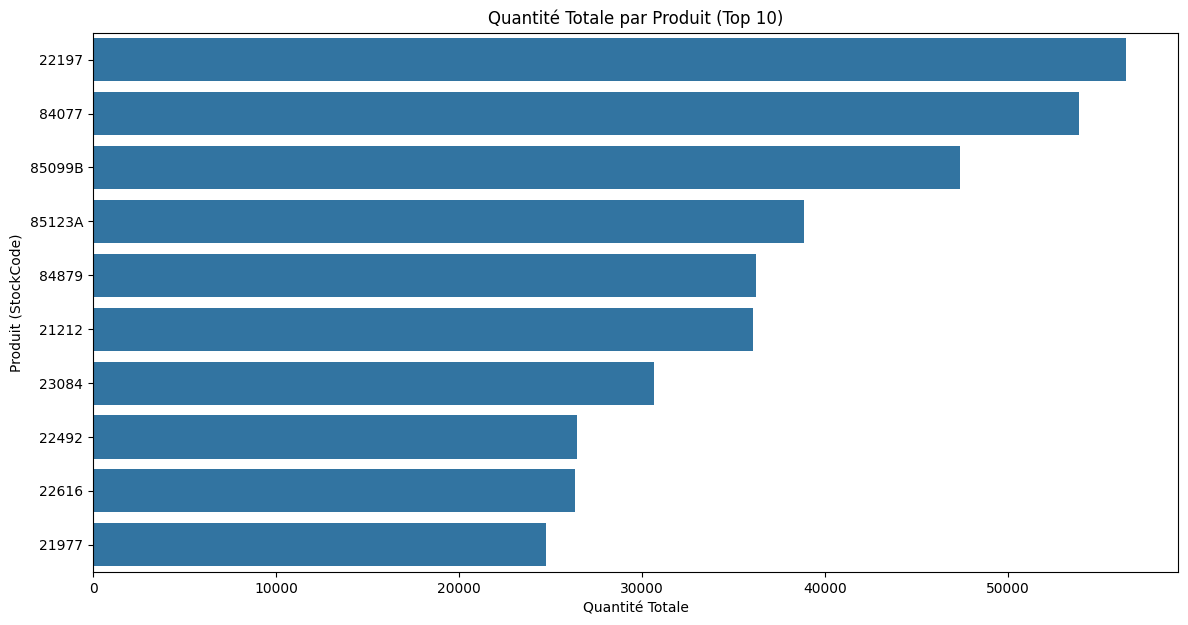

In [11]:
plt.figure(figsize=(14, 7))
quantity_by_product = df.groupby('StockCode')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False).head(10)
sns.barplot(x='Quantity', y='StockCode', data=quantity_by_product)
plt.title('Quantité Totale par Produit (Top 10)')
plt.xlabel('Quantité Totale')
plt.ylabel('Produit (StockCode)')
plt.show()


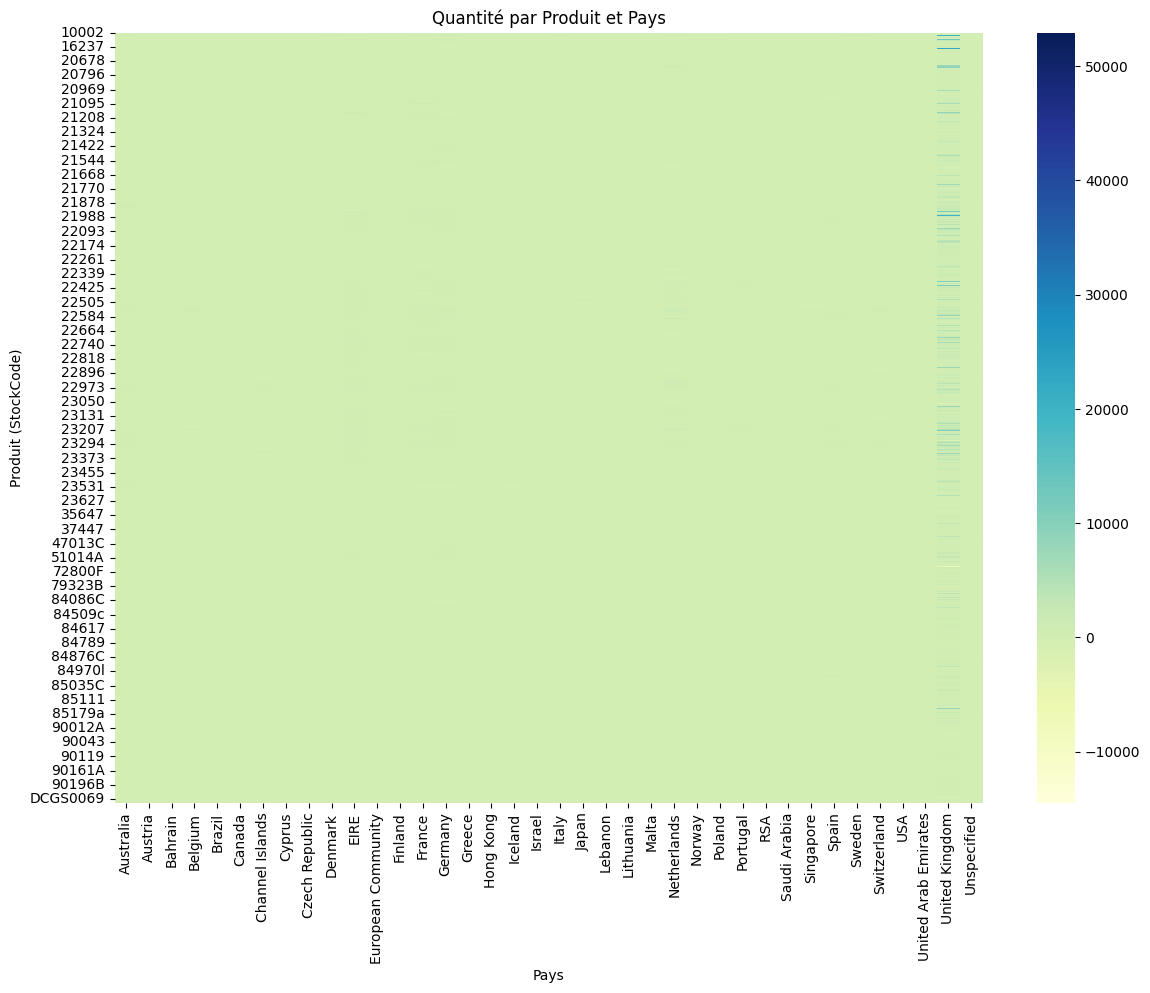

In [14]:
quantity_pivot = df.pivot_table(values='Quantity', index='StockCode', columns='Country', aggfunc='sum', fill_value=0)

plt.figure(figsize=(14, 10))
sns.heatmap(quantity_pivot, cmap="YlGnBu", cbar=True)
plt.title('Quantité par Produit et Pays')
plt.xlabel('Pays')
plt.ylabel('Produit (StockCode)')
plt.show()
